<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Daten-einlesen-und-Daten-verstehen" data-toc-modified-id="MNIST-Daten-einlesen-und-Daten-verstehen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Daten einlesen und Daten verstehen</a></span></li><li><span><a href="#Mal-beispielhaft-ein-Trainingsbild-anzeigen" data-toc-modified-id="Mal-beispielhaft-ein-Trainingsbild-anzeigen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mal beispielhaft ein Trainingsbild anzeigen</a></span></li><li><span><a href="#Perzeptrongewichtsmatrix-erstellen" data-toc-modified-id="Perzeptrongewichtsmatrix-erstellen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perzeptrongewichtsmatrix erstellen</a></span></li><li><span><a href="#Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix" data-toc-modified-id="Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aktivierungen berechnen: Input mal Gewichtsmatrix</a></span></li><li><span><a href="#Outputs-berechnen" data-toc-modified-id="Outputs-berechnen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outputs berechnen</a></span></li><li><span><a href="#Fehler-berechnen" data-toc-modified-id="Fehler-berechnen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fehler berechnen</a></span></li><li><span><a href="#Gewichtsaktualisierungen-berechnen" data-toc-modified-id="Gewichtsaktualisierungen-berechnen-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gewichtsaktualisierungen berechnen</a></span></li><li><span><a href="#Testen-des-Perzeptrons" data-toc-modified-id="Testen-des-Perzeptrons-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testen des Perzeptrons</a></span></li><li><span><a href="#Perzeptron-Training" data-toc-modified-id="Perzeptron-Training-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perzeptron Training</a></span></li></ul></div>

# MNIST Daten einlesen und Daten verstehen

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# download and read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.num_examples

55000

In [4]:
mnist.test.num_examples

10000

In [5]:
mnist.validation.num_examples

5000

In [6]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(55000, 784)

In [9]:
28*28

784

In [10]:
y_train.shape

(55000, 10)

In [11]:
y_train

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000, 10)

# Mal beispielhaft ein Trainingsbild anzeigen

In [14]:
from random import randint
rnd_img_nr = randint(0,y_train.shape[0]-1)

In [15]:
rnd_img_nr

8420

In [16]:
row_vec = x_train[rnd_img_nr, :]

In [17]:
row_vec.shape

(784,)

In [18]:
M = row_vec.reshape(28, 28)

In [19]:
M.shape

(28, 28)

In [20]:
from matplotlib import pyplot as plt

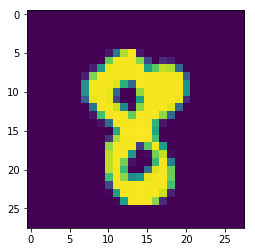

In [21]:
plt.imshow(M)
plt.show()

In [22]:
one_hot_vec = y_train[rnd_img_nr, :]

In [23]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [24]:
import numpy as np
np.argmax(one_hot_vec)

8

# Perzeptrongewichtsmatrix erstellen

In [25]:
nr_inputs = 28*28 + 1
nr_outputs = 10

In [26]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [27]:
W

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [28]:
W.shape

(785, 10)

In [29]:
low = -1.0
high = +1.0
W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )

In [30]:
W

array([[-0.65108896, -0.43959967,  0.57433983, ...,  0.456054  ,
         0.74096815,  0.12912116],
       [ 0.59973964, -0.70971245,  0.04720392, ..., -0.15403361,
         0.77182018,  0.42904317],
       [ 0.72773172,  0.53811417,  0.2301579 , ...,  0.91368266,
        -0.16665068,  0.09508603],
       ..., 
       [ 0.58388914,  0.13289646, -0.25074135, ...,  0.77105338,
         0.9802551 ,  0.10049124],
       [-0.45011776,  0.19533555, -0.96993642, ..., -0.80218736,
        -0.98551667, -0.66943348],
       [-0.26177779,  0.51701388,  0.03260362, ..., -0.17714283,
        -0.72445436, -0.97807169]])

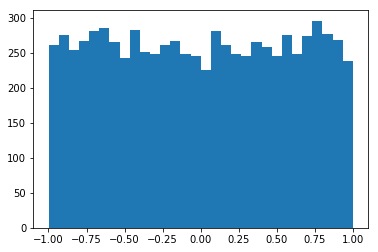

In [31]:
plt.hist(W.reshape(-1), bins=30)
plt.show()

In [32]:
def create_new_perceptron():
    low = -1.0
    high = +1.0
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W

W = create_new_perceptron()

# Aktivierungen berechnen: Input mal Gewichtsmatrix

In [33]:
row_vec.shape

(784,)

In [34]:
type(row_vec)

numpy.ndarray

In [35]:
x = np.append(row_vec,[1])

In [36]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [37]:
x.shape

(785,)

In [38]:
x.ndim

1

In [39]:
W.shape

(785, 10)

In [40]:
W.ndim

2

In [41]:
# Das folgende ist nicht was wir wollen!
# act = x * W 

In [47]:
act = np.matmul(x, W)

In [48]:
act.shape

(10,)

# Outputs berechnen

In [49]:
# Identity
def f(x):
    return x

In [50]:
# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x

In [51]:
f = np.vectorize(f, otypes=[float])

In [52]:
y = f(act)

In [53]:
y

array([ 0.        ,  0.        ,  0.        ,  4.93953775,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.46945404])

Alternative zur Outputberechung über `list comprehension`:

In [50]:
y = [f(x) for x in act]

In [51]:
y = np.array(y)

In [52]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

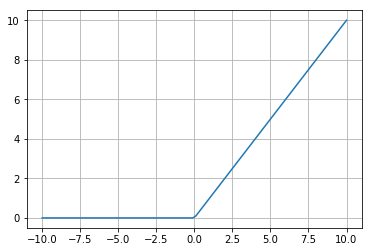

In [97]:
x_values = np.linspace(-10.0,10.0,100)
y_values = [f(x) for x in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

# Fehler berechnen

In [54]:
y

array([ 0.        ,  0.        ,  0.        ,  4.93953775,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.46945404])

In [55]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [56]:
error = one_hot_vec - y

In [57]:
error

array([ 0.        ,  0.        ,  0.        , -4.93953775,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        , -2.46945404])

In [58]:
alpha = 0.01
alpha * error

array([ 0.        ,  0.        ,  0.        , -0.04939538,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01      , -0.02469454])

# Gewichtsaktualisierungen berechnen

Skalare Gewichtsänderungsberechnung:

In [59]:
for j in range(0, nr_outputs):
    for i in range(0,nr_inputs):
        delta_w = alpha * error[j] * x[i]
        print(delta_w)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.000117647070438
0.00572549045086
0.00988235354424
0.00988235354424
0.00992156922817
0.00988235354424
0.00988235354424
0.00925490260124
0.000901960805058
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.000235294140875
0.0057647061348
0.00988235354424
0.00992156922817
0.00988235354424
0.00819607913494
0.00133333340287
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0

Vektorielle Gewichtsänderungsberechnung:

In [60]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x

In [61]:
# Zeige letzten Gewichtsänderungsvektor
print(delta_w_vector.shape)
print(delta_w_vector)

(785,)
[-0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.     

Durchführung der Gewichtsänderung:

In [62]:
W.shape

(785, 10)

In [63]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x    
    W[:,j] =  W[:,j] + delta_w_vector

In [64]:
W.shape

(785, 10)

# Testen des Perzeptrons

In [65]:
W.shape

(785, 10)

In [66]:
nr_test_images = x_test.shape[0]

In [67]:
nr_test_images

10000

In [68]:
correct = 0

for test_img_nr in range(0,nr_test_images):
    row_vec = x_test[test_img_nr, :]
    one_hot_vec = y_test[test_img_nr, :]
    gt_label = np.argmax( one_hot_vec )
    #print(gt_label)
    
    x = np.append(row_vec,[1])
    
    # Aktivierungen der 10 Outputneurone berechnen
    act = np.matmul(x, W)
    
    # Outputs aller 10 Outputneurone berechnen
    out = f(act)
    
    # Was wurde prädiziert?
    is_label = np.argmax( out )
    
    #print(gt_label, is_label)
    
    if is_label == gt_label:
        correct += 1
        
print("Correct: ", correct)

Correct:  1219


In [69]:
def test_perceptron(W):
    
    correct = 0
    for test_img_nr in range(0,nr_test_images):
        row_vec = x_test[test_img_nr, :]
        one_hot_vec = y_test[test_img_nr, :]
        gt_label = np.argmax( one_hot_vec )
        #print(gt_label)

        x = np.append(row_vec,[1])

        # Aktivierungen der 10 Outputneurone berechnen
        act = np.matmul(x, W)

        # Outputs aller 10 Outputneurone berechnen
        out = f(act)

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)

        if is_label == gt_label:
            correct += 1     
            
    print("Correct: ", correct)

In [70]:
test_perceptron(W)

Correct:  1219


# Perzeptron Training

In [71]:
def train_perceptron(W, nr_train_steps, alpha):
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Feed Forward
        row_vec = x_train[rnd_img_nr, :]
        one_hot_vec = y_train[rnd_img_nr, :]
        x = np.append(row_vec,[1])
        act = np.matmul(x, W)
        out = f(act)
        
        # Fehlerberechnung
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            test_perceptron(W)

In [72]:
W = create_new_perceptron()

In [73]:
test_perceptron(W)

Correct:  1054


In [82]:
alpha = 0.01
train_perceptron(W, 3000, alpha)


Train step:  0
Correct:  3793

Train step:  100
Correct:  3509

Train step:  200
Correct:  4049

Train step:  300
Correct:  4537

Train step:  400
Correct:  4596

Train step:  500
Correct:  4441

Train step:  600
Correct:  4388

Train step:  700
Correct:  4495

Train step:  800
Correct:  5058

Train step:  900
Correct:  4784

Train step:  1000
Correct:  4479

Train step:  1100
Correct:  5012

Train step:  1200
Correct:  4581

Train step:  1300
Correct:  4174

Train step:  1400
Correct:  3655

Train step:  1500
Correct:  4526

Train step:  1600
Correct:  4336

Train step:  1700
Correct:  4014

Train step:  1800
Correct:  5280

Train step:  1900
Correct:  4375

Train step:  2000
Correct:  4813

Train step:  2100
Correct:  4762

Train step:  2200
Correct:  4389

Train step:  2300
Correct:  5136

Train step:  2400
Correct:  4552

Train step:  2500
Correct:  5027

Train step:  2600
Correct:  5022

Train step:  2700
Correct:  4841

Train step:  2800
Correct:  4911

Train step:  2900
Correct